## PCA
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability as possible. It transforms a set of possibly correlated variables into a smaller number of uncorrelated variables called principal components. The first principal component accounts for the largest possible variance, and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components. The use of PCA can simplify the complexity in high-dimensional data while retaining trends and patterns. This is particularly useful in processing data for machine learning algorithms, visualizing complex datasets, and in the preprocessing steps of predictive modeling.

Original Data Sample:
   python_yn  R_yn  spark  aws  excel  avg_salary
0        0.0   0.0    0.0  0.0    1.0    117500.0
1        0.0   0.0    0.0  0.0    1.0    117500.0
2        0.0   0.0    0.0  0.0    1.0    117500.0
3        0.0   0.0    0.0  0.0    1.0    117500.0
4        0.0   0.0    0.0  0.0    0.0    167440.0
Transformed Data Sample:
PCA 2 Components Sample:
        PC1       PC2
0 -1.426955 -0.049378
1 -1.426955 -0.049378
2 -1.426955 -0.049378
3 -1.426955 -0.049378
4 -0.383801 -0.212436
PCA 3 Components Sample:
        PC1       PC2       PC3
0 -1.426955 -0.049378  0.364918
1 -1.426955 -0.049378  0.364918
2 -1.426955 -0.049378  0.364918
3 -1.426955 -0.049378  0.364918
4 -0.383801 -0.212436 -1.174971


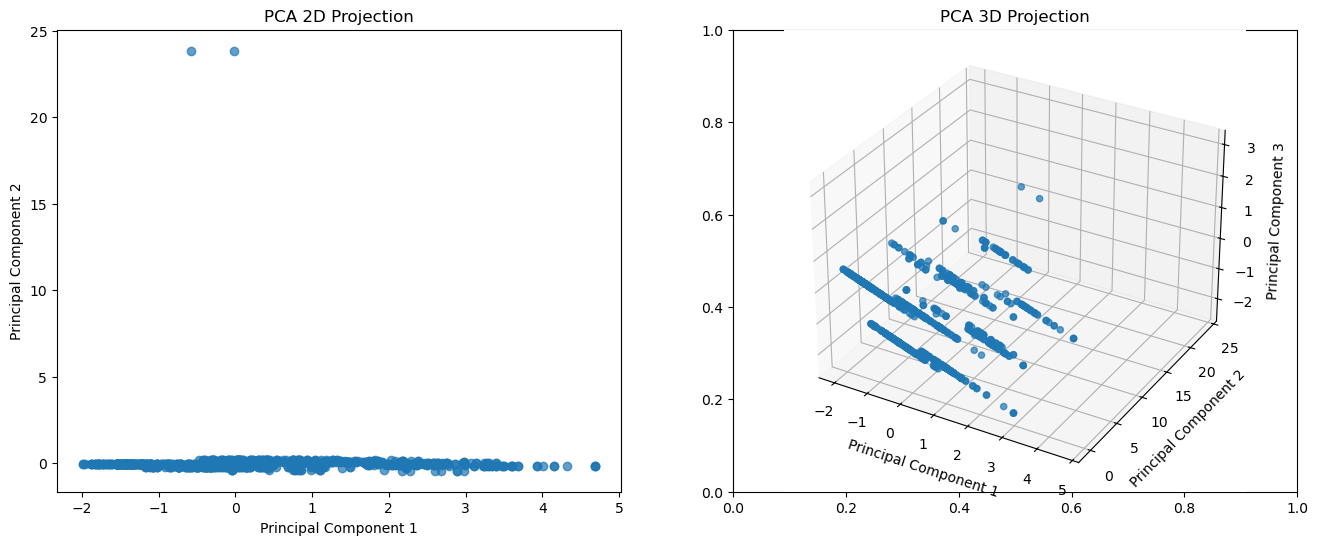

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load data
file_path = 'datasets/final_cleaned_data.csv' 
data = pd.read_csv(file_path)
labels = data['job_category']  
features = data.drop(['Company Name', 'Location', 'Job Title', 'job_category'], axis=1)
data_numeric = data.select_dtypes(include=[np.number])
features_list = ['python_yn', 'R_yn', 'spark', 'aws', 'excel', 'avg_salary']
X = data_numeric[features_list]

print("Original Data Sample:")
print(X.head())  # Print the first few rows of the original dataset

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA transformations
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X_scaled)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Print PCA transformed data sample
print("Transformed Data Sample:")
print("PCA 2 Components Sample:")
print(pd.DataFrame(X_pca_2, columns=['PC1', 'PC2']).head())

print("PCA 3 Components Sample:")
print(pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3']).head())

# Plot 2D and 3D PCA
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_pca_2[:, 0], X_pca_2[:, 1], alpha=0.7)
ax[0].set_title('PCA 2D Projection')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1] = plt.subplot(122, projection='3d')
ax[1].scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], alpha=0.7)
ax[1].set_title('PCA 3D Projection')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[1].set_zlabel('Principal Component 3')
plt.show()


## Clustering

c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


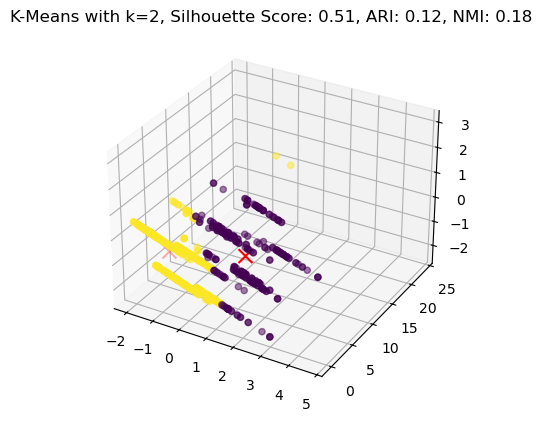

c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


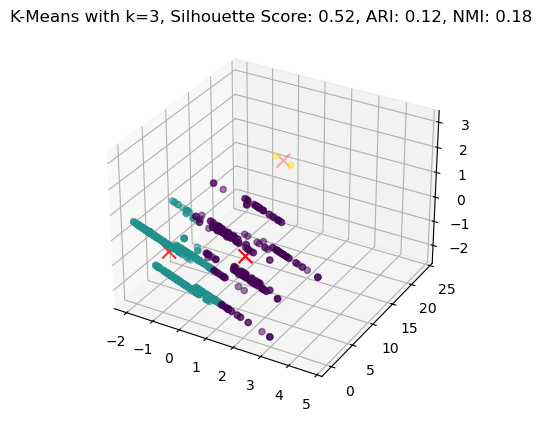

c:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


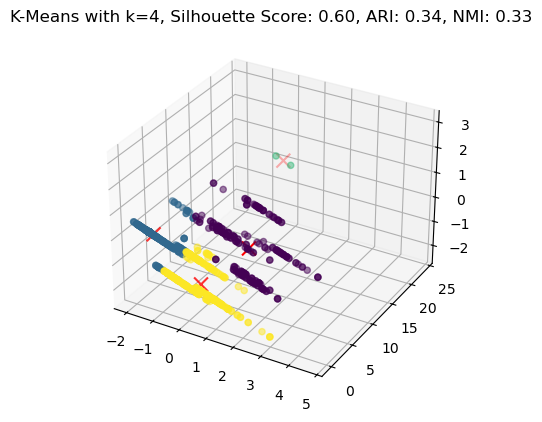

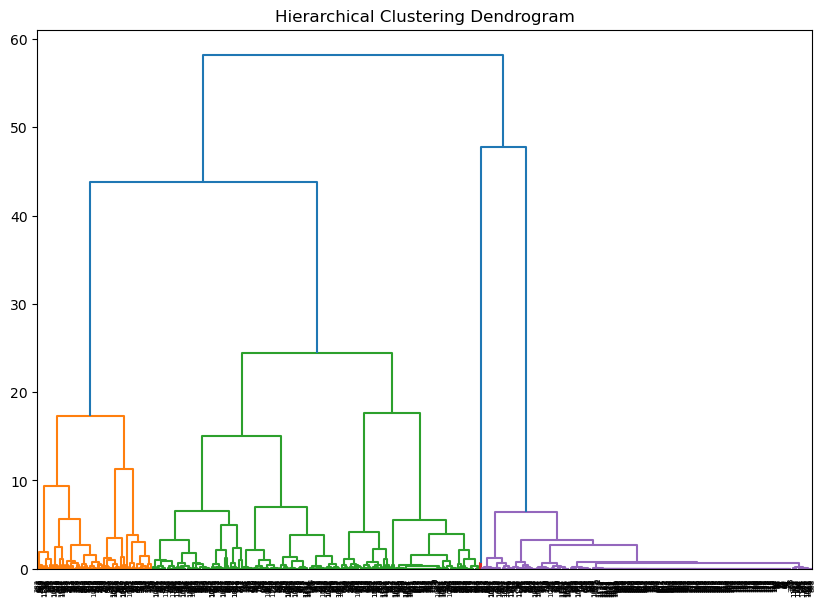

Hierarchical Clustering Silhouette Score: 0.49, ARI: 0.44, NMI: 0.38


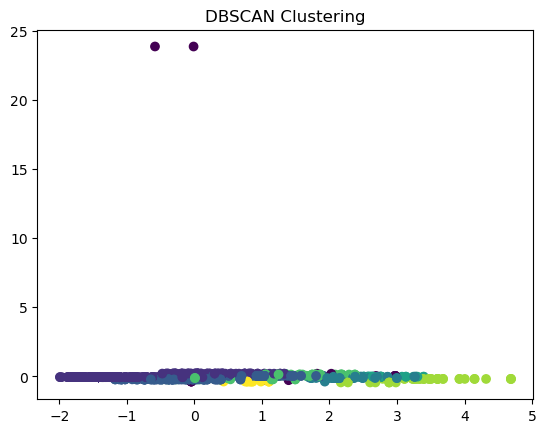

DBSCAN Clustering Silhouette Score: 0.52, ARI: 0.25, NMI: 0.24
Summary of Clustering Comparisons with True Labels:
K-means ARI scores: {2: 0.12061346764563033, 3: 0.12013334607947715, 4: 0.33657152241112354}
K-means NMI scores: {2: 0.1798465616028167, 3: 0.18031149896258558, 4: 0.3275853399869094}
Hierarchical ARI: 0.4360884440666554
Hierarchical NMI: 0.3799134212752234
DBSCAN ARI: 0.24509122294461405
DBSCAN NMI: 0.23701648353822535


In [17]:
# K-means Clustering with centroids
k_values = [2, 3, 4]
kmeans_scores = {}
kmeans_ari_scores = {}
kmeans_nmi_scores = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_kmeans = kmeans.fit_predict(X_pca_3)
    score = silhouette_score(X_pca_3, clusters_kmeans)
    ari_score = adjusted_rand_score(labels, clusters_kmeans)
    nmi_score = normalized_mutual_info_score(labels, clusters_kmeans)
    kmeans_scores[k] = score
    kmeans_ari_scores[k] = ari_score
    kmeans_nmi_scores[k] = nmi_score

    # Plotting clusters and centroids in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=clusters_kmeans, cmap='viridis', alpha=0.5)
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=100, marker='x')  # Plot centroids
    ax.set_title(f'K-Means with k={k}, Silhouette Score: {score:.2f}, ARI: {ari_score:.2f}, NMI: {nmi_score:.2f}')
    plt.show()

# Hierarchical Clustering
Z = linkage(X_pca_3, method='ward')
clusters_hierarchical = fcluster(Z, t=3, criterion='maxclust')
hierarchical_score = silhouette_score(X_pca_3, clusters_hierarchical)
hierarchical_ari = adjusted_rand_score(labels, clusters_hierarchical)
hierarchical_nmi = normalized_mutual_info_score(labels, clusters_hierarchical)
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_score:.2f}, ARI: {hierarchical_ari:.2f}, NMI: {hierarchical_nmi:.2f}")

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca_3)
dbscan_score = silhouette_score(X_pca_3, clusters_dbscan)
dbscan_ari = adjusted_rand_score(labels, clusters_dbscan)
dbscan_nmi = normalized_mutual_info_score(labels, clusters_dbscan)
plt.figure()
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()
print(f"DBSCAN Clustering Silhouette Score: {dbscan_score:.2f}, ARI: {dbscan_ari:.2f}, NMI: {dbscan_nmi:.2f}")

# Summary of comparisons
print("Summary of Clustering Comparisons with True Labels:")
print("K-means ARI scores:", kmeans_ari_scores)
print("K-means NMI scores:", kmeans_nmi_scores)
print("Hierarchical ARI:", hierarchical_ari)
print("Hierarchical NMI:", hierarchical_nmi)
print("DBSCAN ARI:", dbscan_ari)
print("DBSCAN NMI:", dbscan_nmi)

## ARM

In [20]:
! pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

file_path = 'datasets//final_cleaned_data.csv' 
data = pd.read_csv(file_path)

transaction_data = data.apply(lambda x: x.dropna().astype(str).tolist(), axis=1)

te = TransactionEncoder()
te_ary = te.fit(transaction_data).transform(transaction_data)
df = pd.DataFrame(te_ary, columns=te.columns_)


df.to_csv('datasets//prepared_transaction_data.csv', index=False)  
print("Prepared transaction data saved to 'datasets//prepared_transaction_data.csv'")

# Display the first few rows to check the output
print(df.head())


Prepared transaction data saved to 'datasets//prepared_transaction_data.csv'
    0.0  1-800-flowers.com, inc.\n2.8    1.0  100000.0  100880.0  101920.0  \
0  True                         False   True     False     False     False   
1  True                         False   True     False     False     False   
2  True                         False   True     False     False     False   
3  True                         False   True     False     False     False   
4  True                         False  False     False     False     False   

   102500.0  104000.0  106080.0  106948.5  ...  \
0     False     False     False     False  ...   
1     False     False     False     False  ...   
2     False     False     False     False  ...   
3     False     False     False     False  ...   
4     False     False     False     False  ...   

   womanhaven a center for family solutions  woodbridge, nj  \
0                                     False           False   
1                          

In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules.to_csv('datasets//association_rules.csv', index=False)
print("Association rules saved to 'datasets//association_rules.csv'")

rules.head()


Association rules saved to 'datasets//association_rules.csv'


c:\Users\shiva\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(0.0),(1.0),1.000000,0.881223,0.881223,0.881223,1.0,1.0,0.0,1.0,0.0,0.881223,0.0,0.940611
1,(1.0),(0.0),0.881223,1.000000,0.881223,1.000000,1.0,1.0,0.0,inf,0.0,0.881223,0.0,0.940611
2,(0.0),(117500.0),1.000000,0.250655,0.250655,0.250655,1.0,1.0,0.0,1.0,0.0,0.250655,0.0,0.625328
3,(117500.0),(0.0),0.250655,1.000000,0.250655,1.000000,1.0,1.0,0.0,inf,0.0,0.250655,0.0,0.625328
4,(182000.0),(0.0),0.010480,1.000000,0.010480,1.000000,1.0,1.0,0.0,inf,0.0,0.010480,0.0,0.505240


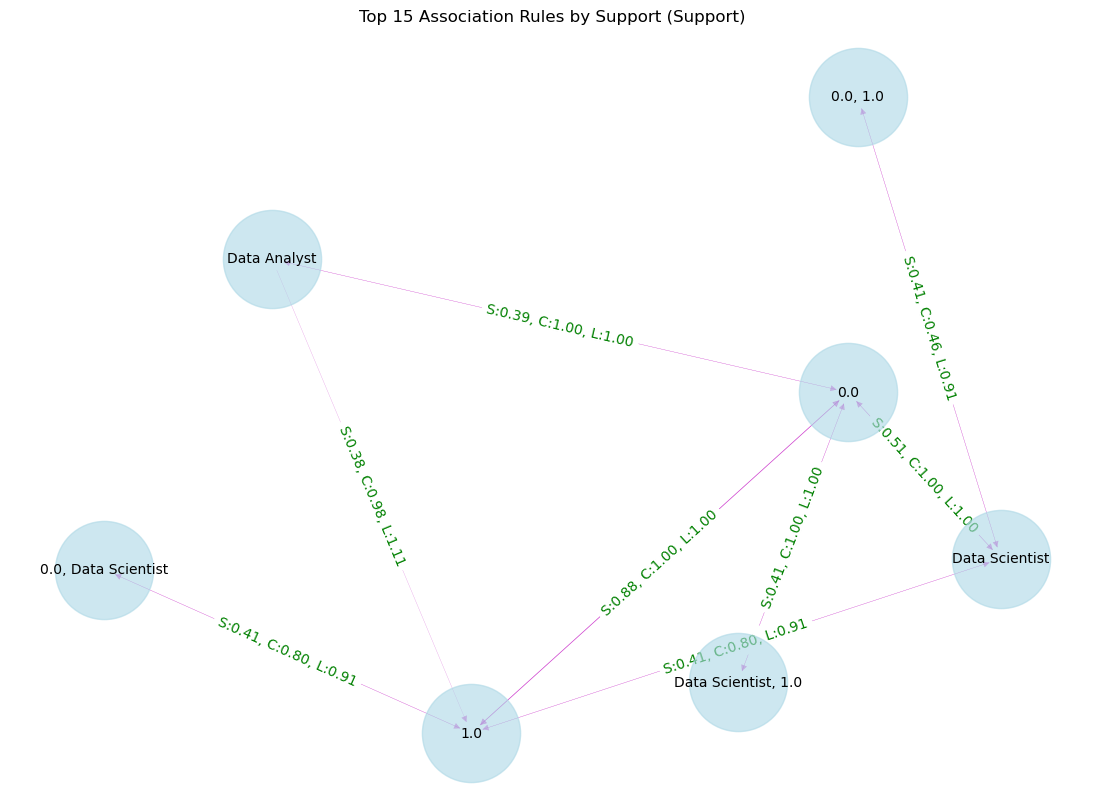

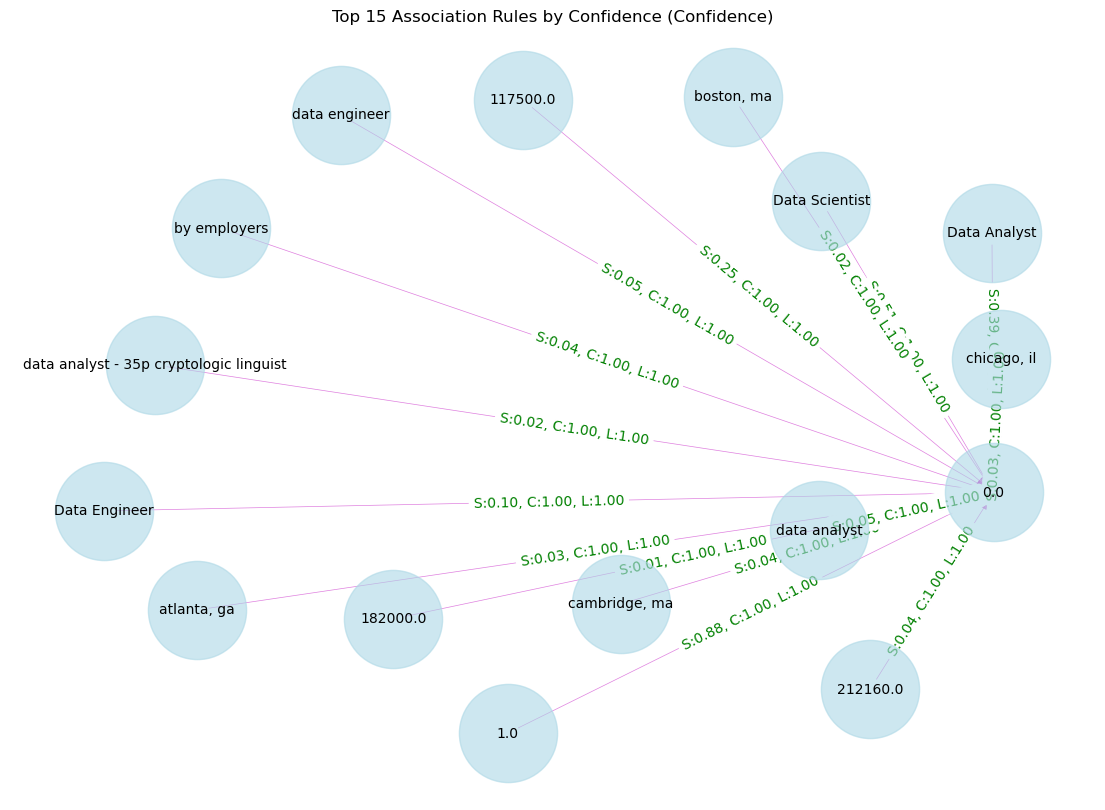

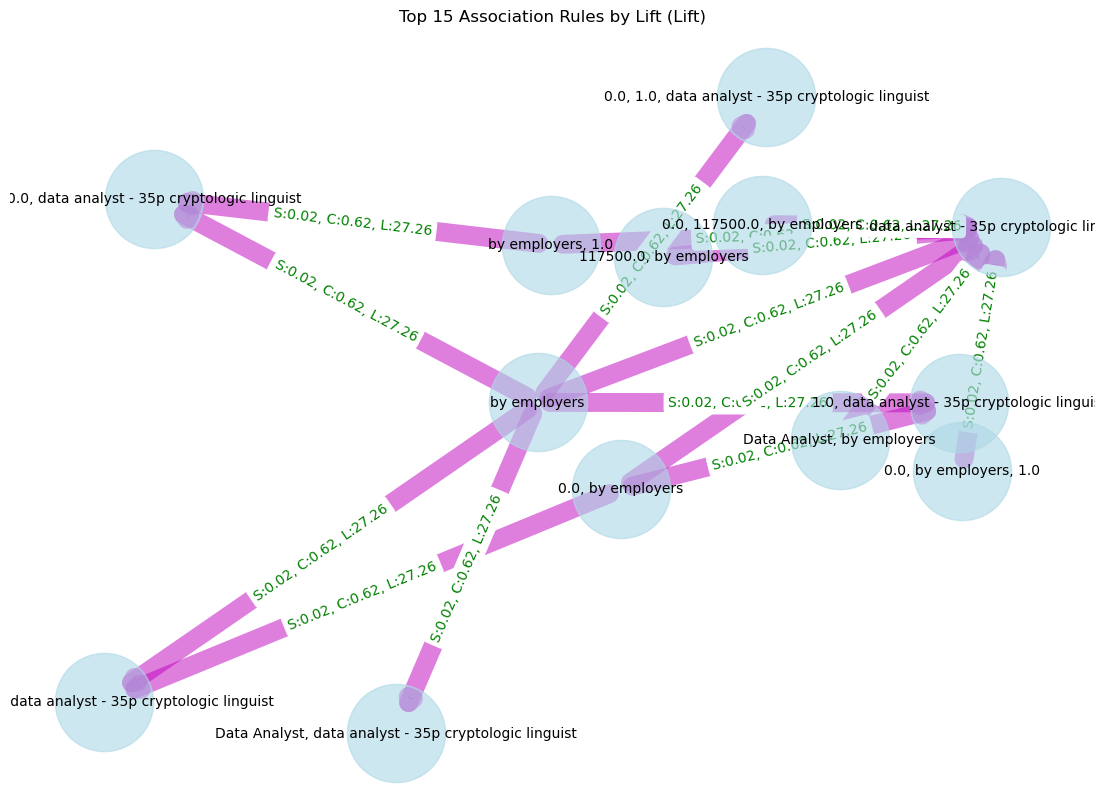

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_graph(rules, metric='lift', top_n=15, title_suffix=''):
    selected_rules = rules.nlargest(top_n, metric)
    
    plt.figure(figsize=(14, 10))
    G = nx.DiGraph()
    
    for _, row in selected_rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        G.add_edge(antecedents, consequents, 
                   weight=row[metric], 
                   support=row['support'], 
                   confidence=row['confidence'], 
                   lift=row['lift'])

    pos = nx.spring_layout(G, k=1, iterations=20)
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=5000, alpha=0.6)
    edge_widths = [G[u][v]['weight']*0.5 for u, v in G.edges()]  # Scale edge width
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='m')
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    edge_labels = dict([((u, v,), f"S:{d['support']:.2f}, C:{d['confidence']:.2f}, L:{d['lift']:.2f}")
                        for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
    
    plt.title(f'Top {top_n} Association Rules by {metric.capitalize()} {title_suffix}')
    plt.axis('off')
    plt.show()

draw_network_graph(rules, metric='support', top_n=15, title_suffix='(Support)')

draw_network_graph(rules, metric='confidence', top_n=15, title_suffix='(Confidence)')

draw_network_graph(rules, metric='lift', top_n=15, title_suffix='(Lift)')

